In [28]:
import pandas as pd
import matplotlib . pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(  
    host='localhost',
    port ='3307',
    user='root',
    password='2080',
    database='ecommerce')

cur= db.cursor()

# list all unique cities where cutomers are located .

In [6]:
 query = """ select distinct customer_city from customers """

cur.execute(query)

data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017.

In [18]:
 query = """ select count(order_id) from orders where year(order_purchase_timestamp)=2017"""

cur.execute(query)

data = cur.fetchall()
"total orders placed in 2017 are ",data[0] [0]

('total orders placed in 2017 are ', 135303)

# Find the total sales per category. 

In [22]:
 query = """ select products.product_category category,
 round(sum(payments.payment_value),2) 
 sales from products join order_items
 on products.product_id=order_items.product_id
 join payments 
 on payments.order_id = order_items.order_id
 group by category"""

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data, columns = ["Category","Sales"])
df

,Category,Sales
0,perfumery,1013477.32
1,Furniture Decoration,2860352.78
2,telephony,973764.10
3,bed table bath,3425107.34
4,automotive,1704588.66
...,...,...
69,cds music dvds,2398.86
70,La Cuisine,5827.06
71,Fashion Children's Clothing,1571.34
72,PC Gamer,4348.86


# Calculate the percentage of orders that were paid in installments.

In [5]:
 query = """select( sum(case when payment_installments >=1 then 1 else 0 end))/count(*)*100 from payments"""

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state.

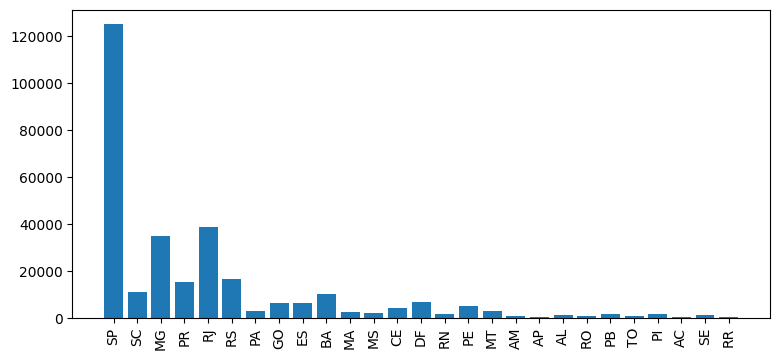

In [11]:
 query = """select customer_state ,count(customer_id) 
 from customers group by customer_state """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data , columns = ["state", "customer_count"])

plt.figure(figsize= (9,4))

plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.show()

# Intermediate Queries
# 1. Calculate the number of orders per month in 2018.

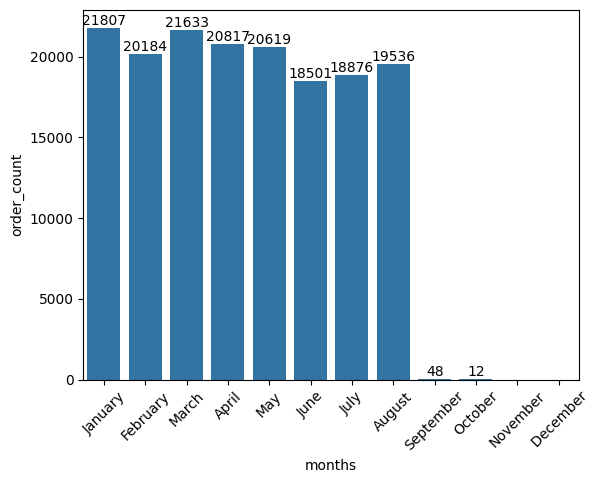

In [26]:
 query = """ select monthname(order_purchase_timestamp) months,  count(order_id) order_count
 from orders where year (order_purchase_timestamp) =2018 
 group by months
 """

cur.execute(query)

data = cur.fetchall()
df=pd.DataFrame(data, columns=["months", "order_count"])
o= ["January", 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',' December']

ax=sns.barplot(x = df["months"], y = df["order_count"], data=df , order = o)
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city.

In [6]:
 query = """
WITH count_per_order AS (
    SELECT 
        orders.order_id, 
        orders.customer_id, 
        COUNT(order_items.order_id) AS oc
    FROM 
        orders 
    JOIN 
        order_items ON orders.order_id = order_items.order_id
    GROUP BY 
        orders.order_id, 
        orders.customer_id
)
SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM 
    customers 
JOIN 
    count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY 
    customers.customer_city order by average_orders desc ;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data , columns = ["cutomer city", "average orders"]) 
df.head(10)

,cutomer city,average orders
0,padre carvalho,21.00
1,celso ramos,19.50
2,datas,18.00
3,candido godoi,18.00
4,matias olimpio,15.00
5,cidelandia,12.00
6,curralinho,12.00
7,picarra,12.00
8,morro de sao paulo,12.00
9,teixeira soares,12.00



# Calculate the percentage of total revenue contributed by each product category

In [11]:
query = """
    SELECT UPPER(products.product_category) AS category,
  ROUND((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM products
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY category
ORDER BY sales_percentage DESC;

"""

cur.execute(query)
data = cur.fetchall()


df = pd.DataFrame(data, columns=["category", " percentage distribution"])
df



,category,percentage distribution
0,BED TABLE BATH,21.40
1,HEALTH BEAUTY,20.71
2,COMPUTER ACCESSORIES,19.81
3,FURNITURE DECORATION,17.87
4,WATCHES PRESENT,17.86
...,...,...
69,PC GAMER,0.03
70,HOUSE COMFORT 2,0.02
71,CDS MUSIC DVDS,0.01
72,FASHION CHILDREN'S CLOTHING,0.01


# Identify the correlation between product price and the number of times a product has been purchased

In [26]:

query = """
SELECT 
    products.product_category,
    COUNT(order_items.product_id) AS product_count,
    ROUND(AVG(order_items.price), 2) AS average_price
FROM 
    products 
JOIN 
    order_items ON products.product_id = order_items.product_id
GROUP BY 
    products.product_category;

"""


cur.execute(query)
data = cur.fetchall()


df = pd.DataFrame(data, columns=["category", "order_count", "price"])


arr1 = df["order_count"]
arr2 = df ["price"]

a=np.corrcoef([arr1,arr2])
print ("the correlaton is", a[0] [-1])


the correlaton is -0.10631514167157562


 # Calculate the total revenue generated by each seller, and rank them by revenue.

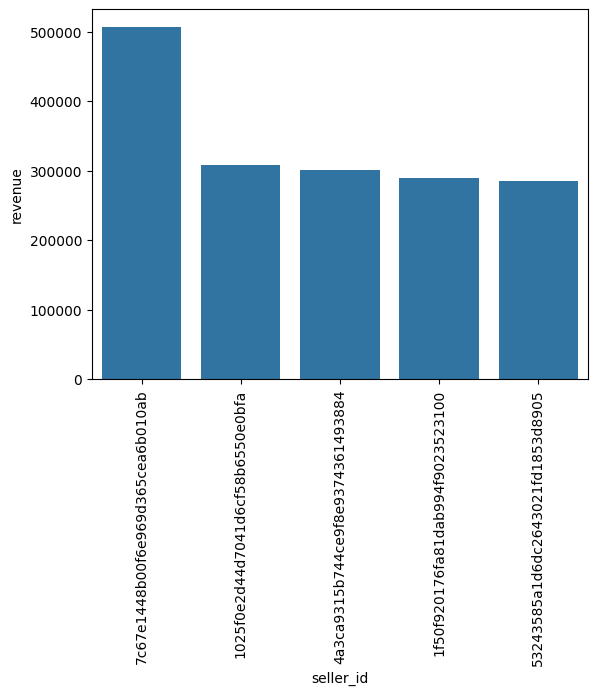

In [4]:

query = """
SELECT *, 
       RANK() OVER (ORDER BY revenue DESC) AS rn 
FROM (
    SELECT order_items.seller_id, 
           SUM(payments.payment_value) AS revenue
    FROM order_items 
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS a;
"""


cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x= "seller_id" , y = "revenue" , data = df)
plt.xticks (rotation = 90)
plt.show()


# Advanced Queries
# 1. Calculate the moving average of order values for each customer over their order history.

In [5]:
 query = """  SELECT 
    customer_id, 
    order_purchase_timestamp, 
    payment,
    AVG(payment) OVER (
        PARTITION BY customer_id 
        ORDER BY order_purchase_timestamp
        ROWS BETWEEN 2 PRECEDING AND CURRENT ROW
    ) AS mov_avg
FROM (
    SELECT 
        orders.customer_id, 
        orders.order_purchase_timestamp,
        payments.payment_value AS payment
    FROM 
        payments 
    JOIN 
        orders ON payments.order_id = orders.order_id
) AS a;
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["customer_id", "order_purchase_timestamp", "payment","mov_avg"])
df 


,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
4,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
...,...,...,...,...
311653,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311654,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000
311655,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
311656,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# 2. Calculate the cumulative sales per month for each year.

In [6]:
 query = """ SELECT 
    years, 
    months, 
    payment, 
    SUM(payment) OVER (ORDER BY years, months) AS cumulative_sales 
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        MONTH(orders.order_purchase_timestamp) AS months,
        ROUND(SUM(payments.payment_value), 2) AS payment 
    FROM 
        orders 
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        years, 
        months 
    ORDER BY 
        years, 
        months
) AS a;
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Years", "months", "payment","cumulative_sales"])
df

,Years,months,payment,cumulative_sales
0,2016,9,756.72,756.72
1,2016,10,177271.44,178028.16
2,2016,12,58.86,178087.02
3,2017,1,415464.12,593551.14
4,2017,2,875724.03,1469275.17
5,2017,3,1349590.80,2818865.97
6,2017,4,1253364.09,4072230.06
7,2017,5,1778756.46,5850986.52
8,2017,6,1533829.14,7384815.66
9,2017,7,1777148.76,9161964.42


# 3. Calculate the year-over-year growth rate of total sales.


In [17]:
query = """
WITH a AS (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        ROUND(SUM(payments.payment_value), 2) AS payment
    FROM 
        orders 
    JOIN 
        payments ON orders.order_id = payments.order_id
    GROUP BY 
        years
    ORDER BY 
        years
)
SELECT 
    years,
    payment,
    ((payment - LAG(payment, 1) OVER (ORDER BY years)) / LAG(payment, 1) OVER (ORDER BY years)) * 100 AS percentage_change
FROM 
    a;
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns=["Years", "Payment", "Percentage Change"])
print(df)


   Years      Payment  Percentage Change
0   2016    178087.02                NaN
1   2017  21749240.18       12112.703756
2   2018  26099289.16          20.000924


 # 4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase

In [22]:
query = """
WITH a AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM 
        customers 
    JOIN 
        orders ON customers.customer_id = orders.customer_id
    GROUP BY 
        customers.customer_id
)
SELECT 
    a.customer_id, 
    COUNT(DISTINCT orders.order_purchase_timestamp) AS order_count
FROM 
    a 
JOIN 
    orders ON orders.customer_id = a.customer_id
    AND orders.order_purchase_timestamp > a.first_order
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
GROUP BY 
    a.customer_id;
"""


cur.execute(query)


data = cur.fetchall()
data

print ("none")

none


 # Identify the top 3 customers who spent the most money in each year.

In [29]:
query = """
SELECT 
    years, 
    customer_id, 
    payment, 
    d_rank 
FROM (
    SELECT 
        YEAR(orders.order_purchase_timestamp) AS years,
        orders.customer_id,
        SUM(payments.payment_value) AS payment,
        DENSE_RANK() OVER (ORDER BY SUM(payments.payment_value) DESC) AS d_rank
    FROM 
        orders 
    JOIN 
        payments ON payments.order_id = orders.order_id
    GROUP BY 
        YEAR(orders.order_purchase_timestamp), 
        orders.customer_id
) AS a 
WHERE 
    d_rank <= 3;
"""


cur.execute(query)


data = cur.fetchall()


columns = ["Years", "Customer_ID", "Payment", "D_Rank"]


df = pd.DataFrame(data, columns=columns)


print(df)



   Years                       Customer_ID       Payment  D_Rank
0   2017  1617b1357756262bfa56ab541c47bc16  40992.240234       1
1   2018  ec5b2ba62e574342386871631fafd3fc  21824.639648       2
2   2017  c6e2731c5b391845f6800c97401a43a9  20787.930176       3
